---
# Benchmarking - 3D CUBE 
---

In [1]:
from benchmark_main import *

# FILE INPUT
+ precalculated network distances 

In [2]:
organism = 'cube' 
net_sizes = [125, 512, 1000, 5832, 10648, 21952]
path = 'plot_data/'

In [ ]:
# save to list 
with open(path+'net_sizes_'+organism+'.txt', 'w') as fo:
    dat=','.join([str(t) for t in net_sizes])
    fo.write(dat)

# read list from file
a_file = open(path+'net_sizes_'+organism+'.txt')
content = a_file. read()
content_list = content.split(',')
a_file.close()
net_sizes = [int(i) for i in content_list]

---
# CALCULATIONS
---

In [5]:
b_file100 = open('netdist_precalc/dist_network_125_cube.pkl', "rb")
dist_network100 = pickle.load(b_file100)
print('100 done')

b_file500 = open('netdist_precalc/dist_network_512_cube.pkl', "rb")
dist_network500 = pickle.load(b_file500)
print('500 done')

100 done
500 done


In [4]:
b_file1k = open('netdist_precalc/dist_network_1000_cube.pkl', "rb")
dist_network1k = pickle.load(b_file1k)
print('1000 done')

1000 done


In [6]:
b_file5k = open('netdist_precalc/dist_network_5832_cube.pkl', "rb")
dist_network5k = pickle.load(b_file5k)
print('5000 done')

5000 done


In [5]:
b_file1_10k = open('netdist_precalc/dist_network_10648_cube_first.pkl', "rb")
part1_10k = pickle.load(b_file1_10k)

b_file2_10k = open('netdist_precalc/dist_network_10648_cube_second.pkl', "rb")
part2_10k = pickle.load(b_file2_10k)

b_file3_10k = open('netdist_precalc/dist_network_10648_cube_third.pkl', "rb")
part3_10k = pickle.load(b_file3_10k)

b_file4_10k = open('netdist_precalc/dist_network_10648_cube_fourth.pkl', "rb")
part4_10k = pickle.load(b_file4_10k)

b_file5_10k = open('netdist_precalc/dist_network_10648_cube_fifth.pkl', "rb")
part5_10k = pickle.load(b_file5_10k)

b_file6_10k = open('netdist_precalc/dist_network_10648_cube_sixth.pkl', "rb")
part6_10k = pickle.load(b_file6_10k)

b_file7_10k = open('netdist_precalc/dist_network_10648_cube_seventh.pkl', "rb")
part7_10k = pickle.load(b_file7_10k)

dist_network10k = {
    **part1_10k,
    **part2_10k,
    **part3_10k,
    **part4_10k,
    **part5_10k,
    **part6_10k,
    **part7_10k
}
print('10k done')

10k done


In [3]:
b_file1_20k = open('netdist_precalc/dist_network_21952_cube_part1.pkl', "rb")
part1_20k = pickle.load(b_file1_20k)

b_file2_20k = open('netdist_precalc/dist_network_21952_cube_part2.pkl', "rb")
part2_20k = pickle.load(b_file2_20k)

b_file3_20k = open('netdist_precalc/dist_network_21952_cube_part3.pkl', "rb")
part3_20k = pickle.load(b_file3_20k)

b_file4_20k = open('netdist_precalc/dist_network_21952_cube_part4.pkl', "rb")
part4_20k = pickle.load(b_file4_20k)

dist_network20k = {
    **part1_20k,
    **part2_20k,
    **part3_20k,
    **part4_20k
}
print('20k done')

20k done


# GLOBAL LAYOUT 

In [5]:
# 3D CUBE 
organism = 'cubegrid'

feature = 'RWRvis'
r = .9
alpha = 1.0

# parameters (post - testing)
n_neighbors = 10 #8
spread = 1 #1
min_dist = 0.9 #0.0
metric = 'cosine'
lnr = 1
nep = None

In [32]:
#########
# 1 0 0 
#########

G = nx.grid_graph([5,5,5],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network100.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network100, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:06
7750
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9703168486749821


In [10]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

In [11]:
#########
# 5 0 0 
#########

G = nx.grid_graph([8,8,8],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network500.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network500, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:02
130816
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9948391633188725


In [12]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

In [16]:
#########
# 1 0 0 0 
#########

G = nx.grid_graph([10,10,10],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network1k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:12
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9948800953317772


In [13]:
#########
# 5 0 0 0 
#########

G = nx.grid_graph([18,18,18],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network5k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network5k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:33
17003196
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9943898153340129


In [14]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

In [ ]:
#########
# 1 0 0 0 0 
#########

G = nx.grid_graph([22,22,22],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network10k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

#r_global = pearson_corrcoef(dist_network10k, dist_global)
#print('RWR corr coef: ',r_global)

RWR


In [ ]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

In [ ]:
#########
# 2 0 0 0 0 
#########

G = nx.grid_graph([28,28,28],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network20k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network20k, dist_global)
print('RWR corr coef: ',r_global)

In [9]:
# pearson correlation coefficient 

d_netsize_corr_global = {(5,5,5):0.991,
                           (8,8,8):0.999,
                           (10,10,10):0.994,
                           (18,18,18):0.996,
                            (22,22,22):0.993, 
                            (28,28,28):0.997
                           }

# time in seconds 

d_netsize_time = {
                           (5,5,5):1,
                           (8,8,8):3,
                           (10,10,10):13,
                           (18,18,18):57,
                           (22,22,22):375, #6min 15s
                           (28,28,28):991 #16min 30s
                          }

### FILES 

In [5]:
# pearson correlation coefficient 
with open(path+'d_netsize_corr_global_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_corr_global, handle)

with open(path+'d_netsize_corr_global_'+organism+'.txt', 'rb') as handle:
    d_netsize_corr_global = pickle.loads(handle.read())
    
    
# time in seconds 
with open(path+'d_netsize_time_global_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_time, handle)

with open(path+'d_netsize_time_global_'+organism+'.txt', 'rb') as handle:
    d_netsize_time = pickle.loads(handle.read())

# NODE2VEC

In [7]:
# 3D CUBE 
feature = 'nodevec'

# parameters (post - testing)
n_neighbors = 20 #8
spread = 1 #1
min_dist = 0.0 #0.0
metric = 'cosine'
lnr = 1
nep = None

In [8]:
#########
# 1 0 0 
#########

G = nx.grid_graph([5,5,5],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network100.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network100, dist_nodevec)
print('Corr coef: ',r_global)

Node2Vec
Execution Time: 00:00:15
7750
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9650055930510086


In [9]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [10]:
#########
# 5 0 0 
#########

G = nx.grid_graph([8,8,8],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network500.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network500, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:00:32
130816
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9736743555548081


In [11]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [10]:
#########
# 1 0 0 0 
#########

G = nx.grid_graph([10,10,10],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network1k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network1k, dist_nodevec)
print('Corr coef: ',r_global)

Node2Vec
Execution Time: 00:01:30
499500
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9774322005784412


In [ ]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [ ]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [ ]:
#########
# 5 0 0 0 
#########

G = nx.grid_graph([18,18,18],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network5k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network5k, dist_nodevec)
print('Corr coef: ',r_global)

Node2Vec
Execution Time: 00:06:12
17003196
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done


In [ ]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [37]:
#########
# 1 0 0 0 0 
#########

G = nx.grid_graph([22,22,22],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network10k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network10k, dist_nodevec)
print('Corr coef: ',r_global)

Node2Vec
Execution Time: 00:05:24
46684628
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9844498271515664


In [ ]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [5]:
#########
# 2 0 0 0 0 
#########

G = nx.grid_graph([28,28,28],periodic=False)
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))

pairs=list(dist_network20k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_global = pearson_corrcoef(dist_network20k, dist_nodevec)
print('Corr coef: ',r_global)

Node2Vec
Execution Time: 00:17:27
10441233
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9842639539669642


In [ ]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [6]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_nodevec = {(5,5,5):0.965, #0.953,
                           (8,8,8):0.977,
                           (10,10,10):0.977,
                           (18,18,18):0.974,
                           (22,22,22):0.980,
                           (28,28,28):0.980
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_nodevec = {          (5,5,5):17, #3,
                               (8,8,8):45, #12,
                               (10,10,10):90, #22,
                               (18,18,18):138, #2min 18s
                               (22,22,22):324, #5min 24s
                               (28,28,28):1087 #17min 47s
                               }

### FILES 

In [7]:
# pearson correlation coefficient 
with open(path+'d_netsize_corr_nodevec_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_corr_nodevec, handle)

with open(path+'d_netsize_corr_nodevec_'+organism+'.txt', 'rb') as handle:
    d_netsize_corr_nodevec = pickle.loads(handle.read())
    
    
# time in seconds 
with open(path+'d_netsize_time_nodevec_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_time_nodevec, handle)

with open(path+'d_netsize_time_nodevec_'+organism+'.txt', 'rb') as handle:
    d_netsize_time_nodevec = pickle.loads(handle.read())

# FORCE-DIRECTED | NETWORKX
+ using the spring-layout

In [ ]:
#########
# 1 0 0 
#########

G = nx.grid_graph([5,5,5],periodic=False)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=2400)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network100.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_nx = pearson_corrcoef(dist_network100, dist_spring_nx)
print('Corr coef: ',r_spring_nx)

In [ ]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [ ]:
#########
# 5 0 0 
#########

G = nx.grid_graph([8,8,8],periodic=False)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=75)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network500.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_nx = pearson_corrcoef(dist_network500, dist_spring_nx)
print('Corr coef: ',r_spring_nx)

In [ ]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [ ]:
#########
# 1 0 0 0 
#########

G = nx.grid_graph([10,10,10],periodic=False)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=125)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_nx = pearson_corrcoef(dist_network1k, dist_spring_nx)
print('SPRING corr coef: ',r_spring_nx)

In [ ]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [5]:
print('Runtime spring for Corr. Coeff. 0.99')

G = nx.grid_graph([10,10,10],periodic=False)

start = time.time()
posG_spring = springlayout_3D(G,itr=400)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('Corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.99
Execution Time: 00:00:44
prep layout distance
prep network distance
prep corr. coeff. data
calculate corr. coeff.
SPRING corr coef:  0.9939791128279677


In [46]:
#########
# 5 0 0 0 
#########

G = nx.grid_graph([18,18,18],periodic=False)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=30)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network5k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_nx = pearson_corrcoef(dist_network5k, dist_spring_nx)
print('Corr coef: ',r_spring_nx)

SPRING
Execution Time: 00:00:43
17003196
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9397504255788244


In [47]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [3]:
print('Runtime spring for Corr. Coeff. 0.99')

G = nx.grid_graph([18,18,18],periodic=False)

start = time.time()
posG_spring = springlayout_3D(G,itr=2000)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network5k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('Corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.99
Execution Time: 01:00:00
SPRING corr coef:  0.9961185385037217


In [ ]:
#########
# 1 0 0 0 0 
#########

G = nx.grid_graph([22,22,22],periodic=False)

print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=20)
end = time.time()
m,s = exec_time(start,end)

In [6]:
pairs=list(dist_network10k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring_nx = pearson_corrcoef(dist_network10k, dist_spring_nx)
print('Corr coef: ',r_spring_nx)

46684628
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
Corr coef:  0.862732219885896


In [7]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [ ]:
print('Runtime spring for Corr. Coeff. 0.98')

G = nx.grid_graph([22,22,22],periodic=False)

start = time.time()
posG_spring = springlayout_3D(G,itr=50000)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network10k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('Corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.98


In [3]:
#########
# 2 0 0 0 0 
#########

G = nx.grid_graph([28,28,28],periodic=False)

print('spring')
start = time.time()
posG_spring = springlayout_3D(G,itr=45)
end = time.time()
m,s = exec_time(start,end)
print('spring done')

spring
Execution Time: 00:21:40
spring done


In [5]:
pairs=list(dist_network20k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring)

10441233
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
complete


In [ ]:
r_spring_nx = pearson_corrcoef(dist_network20k, dist_spring_nx)
print('Corr coef: ',r_spring_nx)

In [6]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

#### CORR COEF / NETSIZE - saved values for diagram
+ for equal running time

In [8]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_nx = {(5,5,5):0.996,
                           (8,8,8):0.990,
                           (10,10,10):0.975,
                           (18,18,18):0.870,
                           (22,22,22):0.751,
                           (28,28,28):0.504
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_nx = {          (5,5,5):2,
                               (8,8,8):3,
                               (10,10,10):44,
                               (18,18,18):3600,
                               (22,22,22):10000, # run again 
                               (28,28,28):43200 #12h cut off
                               }

### FILES 

In [9]:
# pearson correlation coefficient 
with open(path+'d_netsize_corr_nx_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_corr_nx, handle)

with open(path+'d_netsize_corr_nx_'+organism+'.txt', 'rb') as handle:
    d_netsize_corr_nx = pickle.loads(handle.read())
    
    
# time in seconds 
with open(path+'d_netsize_time_nx_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_time_nx, handle)

with open(path+'d_netsize_time_nx_'+organism+'.txt', 'rb') as handle:
    d_netsize_time_nx = pickle.loads(handle.read())

# FORCE-DIRECTED | iGRAPH
+ https://igraph.org/python/doc/tutorial/visualisation.html
+ https://towardsdatascience.com/newbies-guide-to-python-igraph-4e51689c35b4
+ https://igraph.org/c/doc/igraph-Layout.html#igraph_layout_fruchterman_reingold_3d
+ using the fruchterman-reingold layout

In [19]:
import igraph as ig

In [42]:
print('Run for', d_netsize_time[(5,5,5)],'seconds')

#########
# 1 0 0 
#########

nxG = nx.grid_graph([5,5,5],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 20000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(nxG,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network100.keys())
print('calulate distances')
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring_ig = pearson_corrcoef(dist_network100, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

Run for 1 seconds
SPRING - igraph
Execution Time: 00:00:01


calulate distances
7750
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9972312957251723


In [43]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [44]:
print('Run for', d_netsize_time[(8,8,8)],'seconds')

#########
# 5 0 0 
#########

nxG = nx.grid_graph([8,8,8],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 4500)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(nxG,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network500.keys())
print('calulate distances')
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring_ig = pearson_corrcoef(dist_network500, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

Run for 3 seconds
SPRING - igraph
Execution Time: 00:00:03


calulate distances
130816
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9975192159316977


In [45]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [13]:
print('Run for', d_netsize_time[(10,10,10)],'seconds')

#########
# 1 0 0 0 
#########

nxG = nx.grid_graph([10,10,10],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter= 4000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network1k.keys())
print('calulate distances')
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring_ig = pearson_corrcoef(dist_network1k, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

Run for 13 seconds
SPRING - igraph
Execution Time: 00:00:12
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.992747356542491


In [ ]:
path = ''
with open(path+'dist_spring_ig_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [36]:
print('Run for', d_netsize_time[(18,18,18)],'seconds')

#########
# 5 0 0 0 
#########

nxG = nx.grid_graph([18,18,18],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=500)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(nxG,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network5k.keys())
print('calulate distances')
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring_ig = pearson_corrcoef(dist_network5k, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

Run for 57 seconds
SPRING - igraph
Execution Time: 00:00:47


calulate distances
17003196
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9864898987059374


In [40]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [27]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[(18,18,18)])

nxG = nx.grid_graph([18,18,18],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=2000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network5k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('Corr coef: ',r_spring)

Run for pearson corr.: 0.996
SPRING - igraph
Execution Time: 00:03:31
17003196
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9916446657389857


In [10]:
print('Run for', d_netsize_time[(22,22,22)],'seconds')

#########
# 1 0 0 0 0 
#########

nxG = nx.grid_graph([22,22,22],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=950)
posG_spring = dict(zip(list(nxG.nodes()),posG))

posG_spring_norm = minmaxscaling_posG(nxG,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network10k.keys())
print('calulate distances')
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring_ig = pearson_corrcoef(dist_network10k, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

Run for 375 seconds
SPRING - igraph
Execution Time: 00:07:23


calulate distances
46684628
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
Corr coef:  0.8766135598147622


In [11]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [25]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[(22,22,22)])

nxG = nx.grid_graph([22,22,22],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=4000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network10k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('Corr coef: ',r_spring)

Run for pearson corr.: 0.993
SPRING - igraph
Execution Time: 00:11:10
46684628
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9908750850961296


In [4]:
#print('Run for', d_netsize_time[(28,28,28)],'seconds')

#########
# 2 0 0 0 0 
#########

nxG = nx.grid_graph([28,28,28],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=580)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(nxG,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

SPRING - igraph
Execution Time: 00:18:05




In [5]:
pairs = list(dist_network20k.keys())
print('calulate distances')
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

calulate distances
10441233
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
complete


In [ ]:
r_spring_ig = pearson_corrcoef(dist_network20k, dist_spring_ig)
print('Corr coef: ',r_spring_ig)

# iter 580 > 0.939 > 15min 38s

In [6]:
path = ''
with open(path+'dist_spring_ig_'+str(len(nxG.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [ ]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[(28,28,28)])

nxG = nx.grid_graph([28,28,28],periodic=False)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=5000)
posG_spring = dict(zip(nxG.nodes(),posG))

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network20k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('Corr coef: ',r_spring)

Run for pearson corr.: 0.997


In [10]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_ig = {       (5,5,5): 0.998,  
                            (8,8,8): 0.996,
                            (10,10,10): 0.997,
                            (18,18,18): 0.988,
                            (22,22,22): 0.984,
                            (28,28,28): 0.939,
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_ig = {          (5,5,5): 1,
                               (8,8,8): 3,
                               (10,10,10):13,
                               (18,18,18):211, #3min 31s ,
                               (22,22,22):670, #11min 10s,
                               (28,28,28):9360 #2h 36min 
                               }

### FILES 

In [11]:
# pearson correlation coefficient 
with open(path+'d_netsize_corr_ig_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_corr_ig, handle)

with open(path+'d_netsize_corr_ig_'+organism+'.txt', 'rb') as handle:
    d_netsize_corr_ig = pickle.loads(handle.read())
    
    
# time in seconds 
with open(path+'d_netsize_time_ig_'+organism+'.txt', 'wb') as handle:
    pickle.dump(d_netsize_time_ig, handle)

with open(path+'d_netsize_time_ig_'+organism+'.txt', 'rb') as handle:
    d_netsize_time_ig = pickle.loads(handle.read())

# DIAGRAMS
+ comparing runtime and pearson corr. coeff. of global layout to three force-directed layout methods 

In [12]:
labelsize = 22
tick_size = 11.5

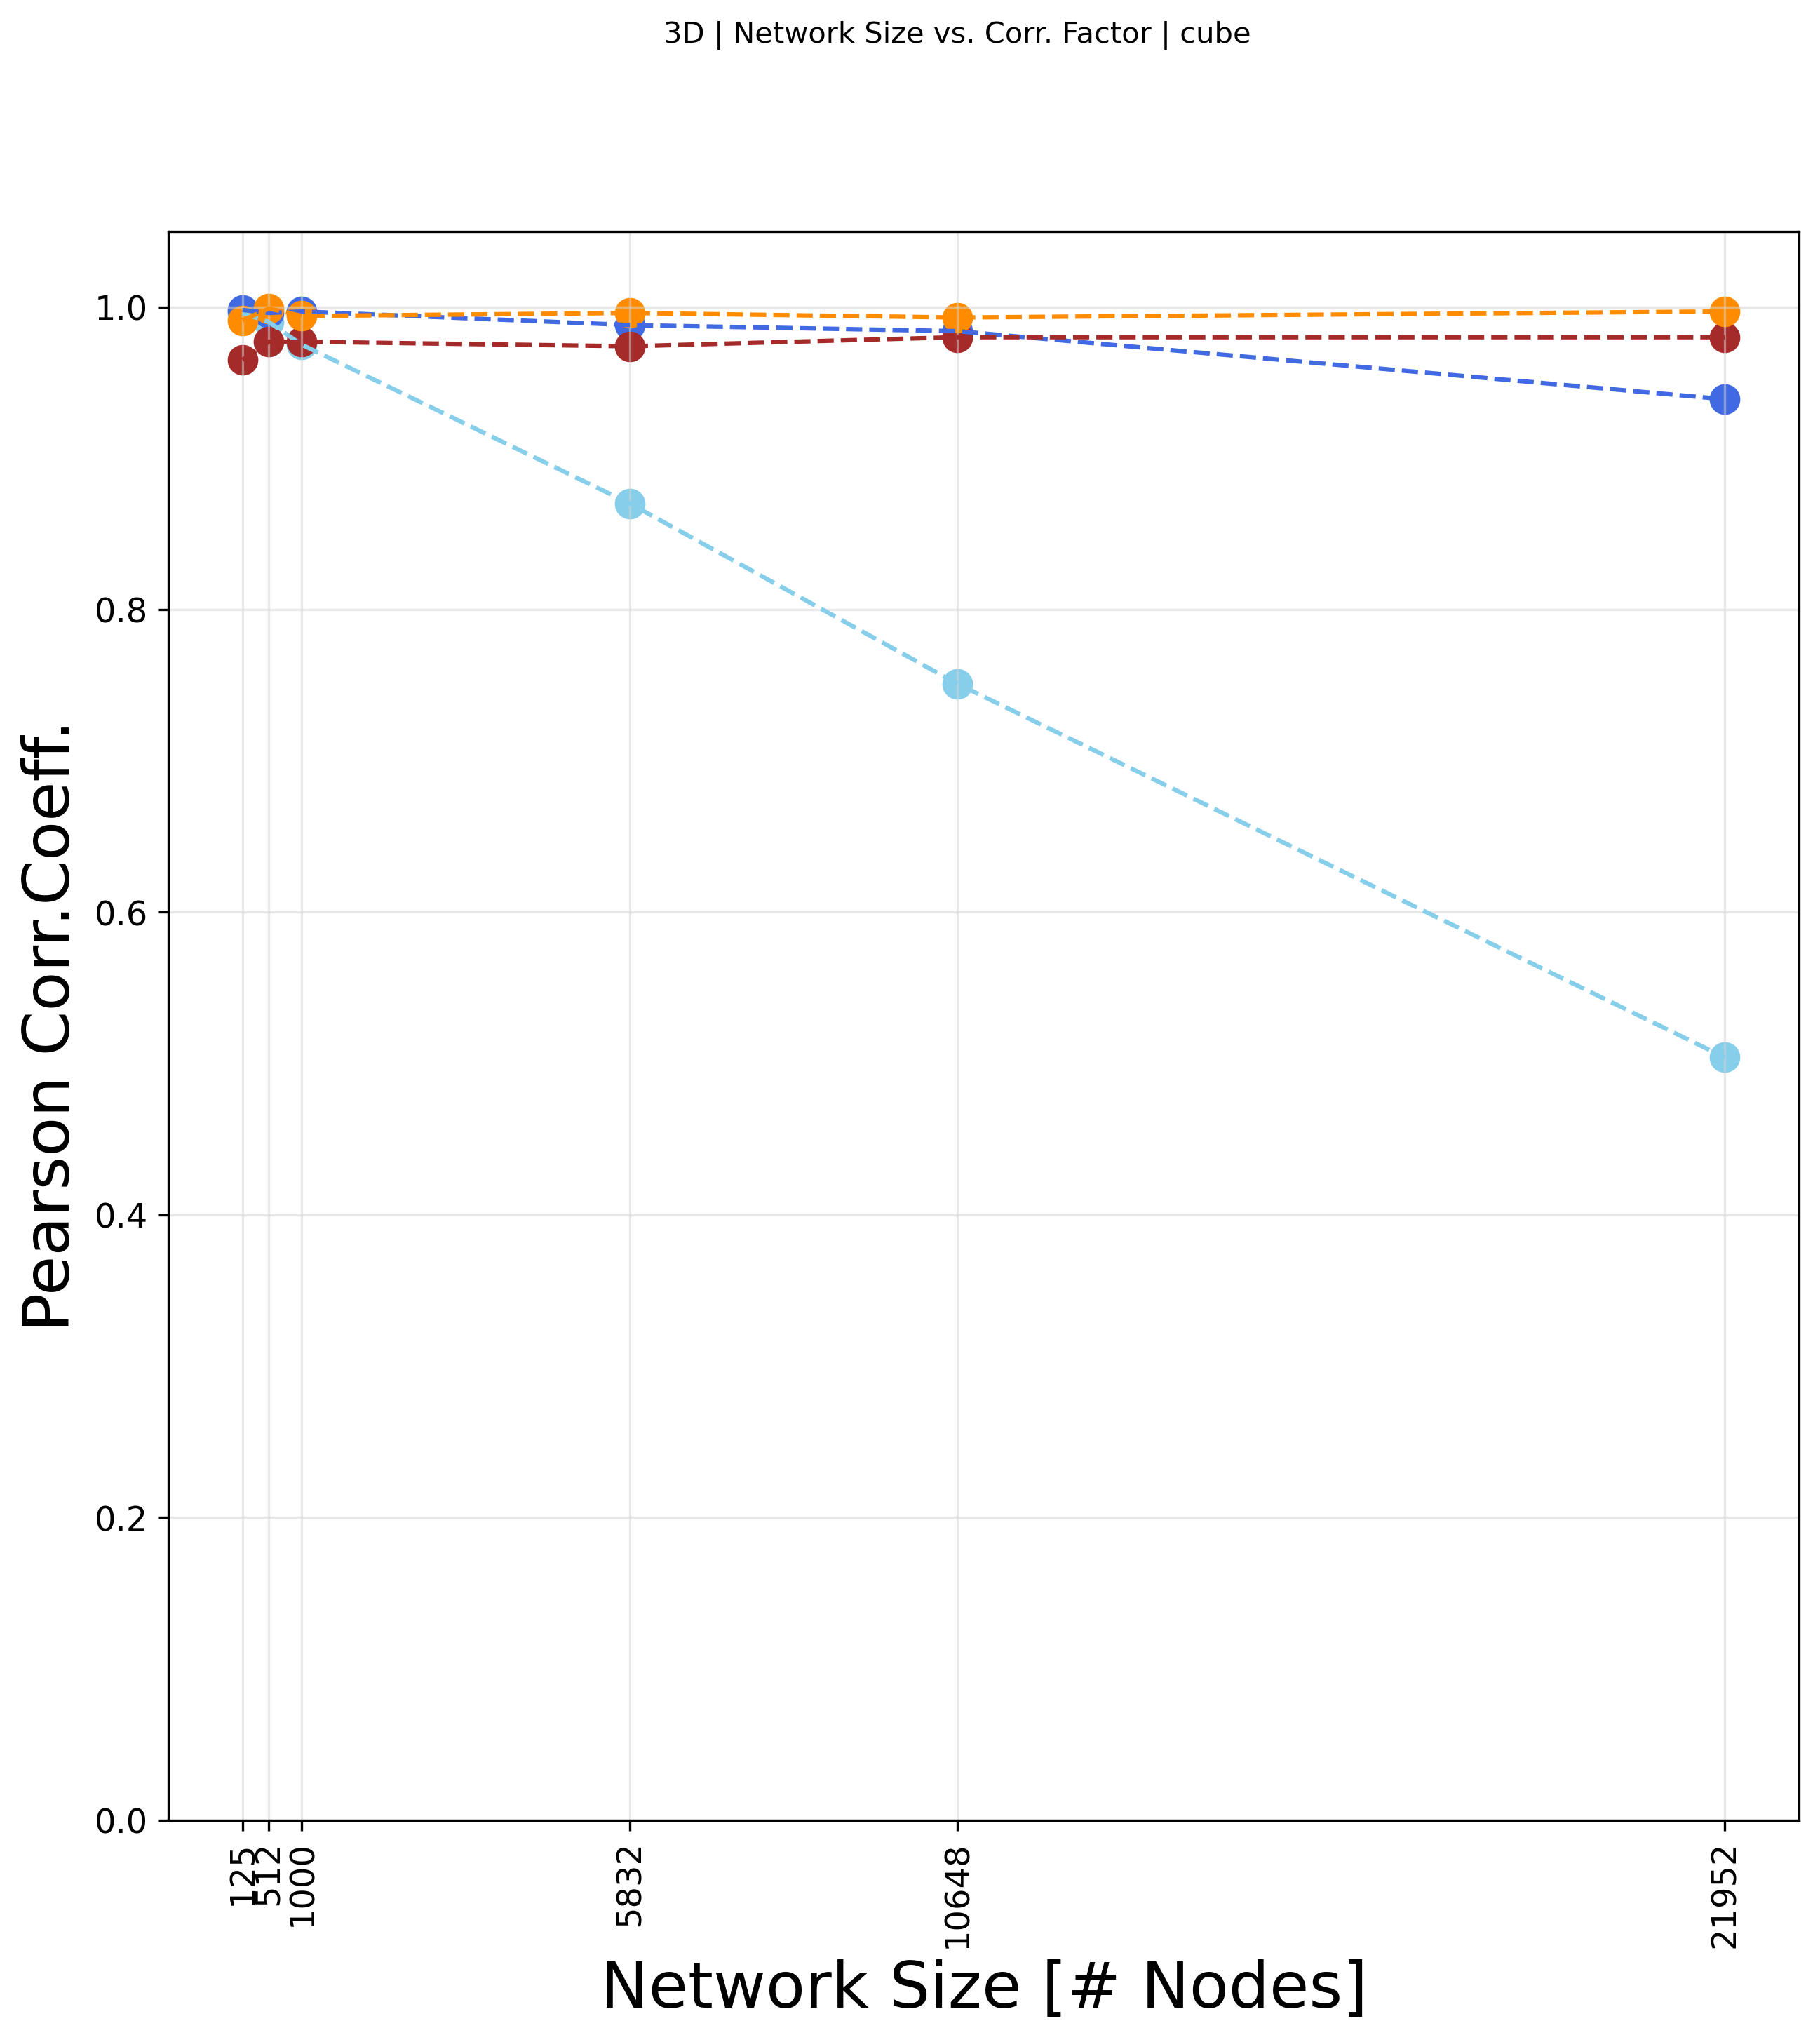

In [13]:
########################################
#
# Network size vs. Correlation Factor 
# with same running time
#
########################################

x_ig = net_sizes # list(d_netsize_time.keys())
y_ig = list(d_netsize_corr_ig.values())

x_nx = net_sizes # list(d_netsize_time.keys())
y_nx = list(d_netsize_corr_nx.values())

x_layout = net_sizes # list(d_netsize_time.keys())
y_layout = list(d_netsize_corr_global.values())

x_nodevec = net_sizes # list(d_netsize_time.keys())
y_nodevec = list(d_netsize_corr_nodevec.values())

fig = plt.figure(figsize=(10,10), dpi=300)
plt.grid(True, c='lightgrey', alpha=0.5)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.ylabel("Pearson Corr.Coeff.", fontsize=labelsize)

plt.plot(x_nx,y_nx, '--', c = 'skyblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nx,y_nx, c = 'skyblue', s = 30*3, alpha = 1.0)

plt.plot(x_ig,y_ig, '--', c = 'royalblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_ig,y_ig, c = 'royalblue', s = 30*3, alpha = 1.0)

plt.plot(x_nodevec,y_nodevec, '--', c = 'brown', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nodevec,y_nodevec, c = 'brown', s = 30*3, alpha = 1.0)

plt.plot(x_layout,y_layout, '--', c = 'darkorange', alpha = 1.0, linewidth=1.5)
plt.scatter(x_layout,y_layout, c = 'darkorange', s = 30*3, alpha = 1.0)

plt.suptitle('3D | Network Size vs. Corr. Factor | '+organism, fontsize=10)
plt.ylim(ymin=0, ymax=1.05)

plt.xticks(net_sizes,fontsize=tick_size, rotation=90)
plt.yticks(fontsize=tick_size)

fig.savefig('../output_plots/benchmark/upscaledNEW_3D_CorrNetsize_'+organism+'_ig_nx.png')
fig.savefig('../output_plots/benchmark/upscaledNEW_3D_CorrNetsize_'+organism+'_ig_nx.pdf')

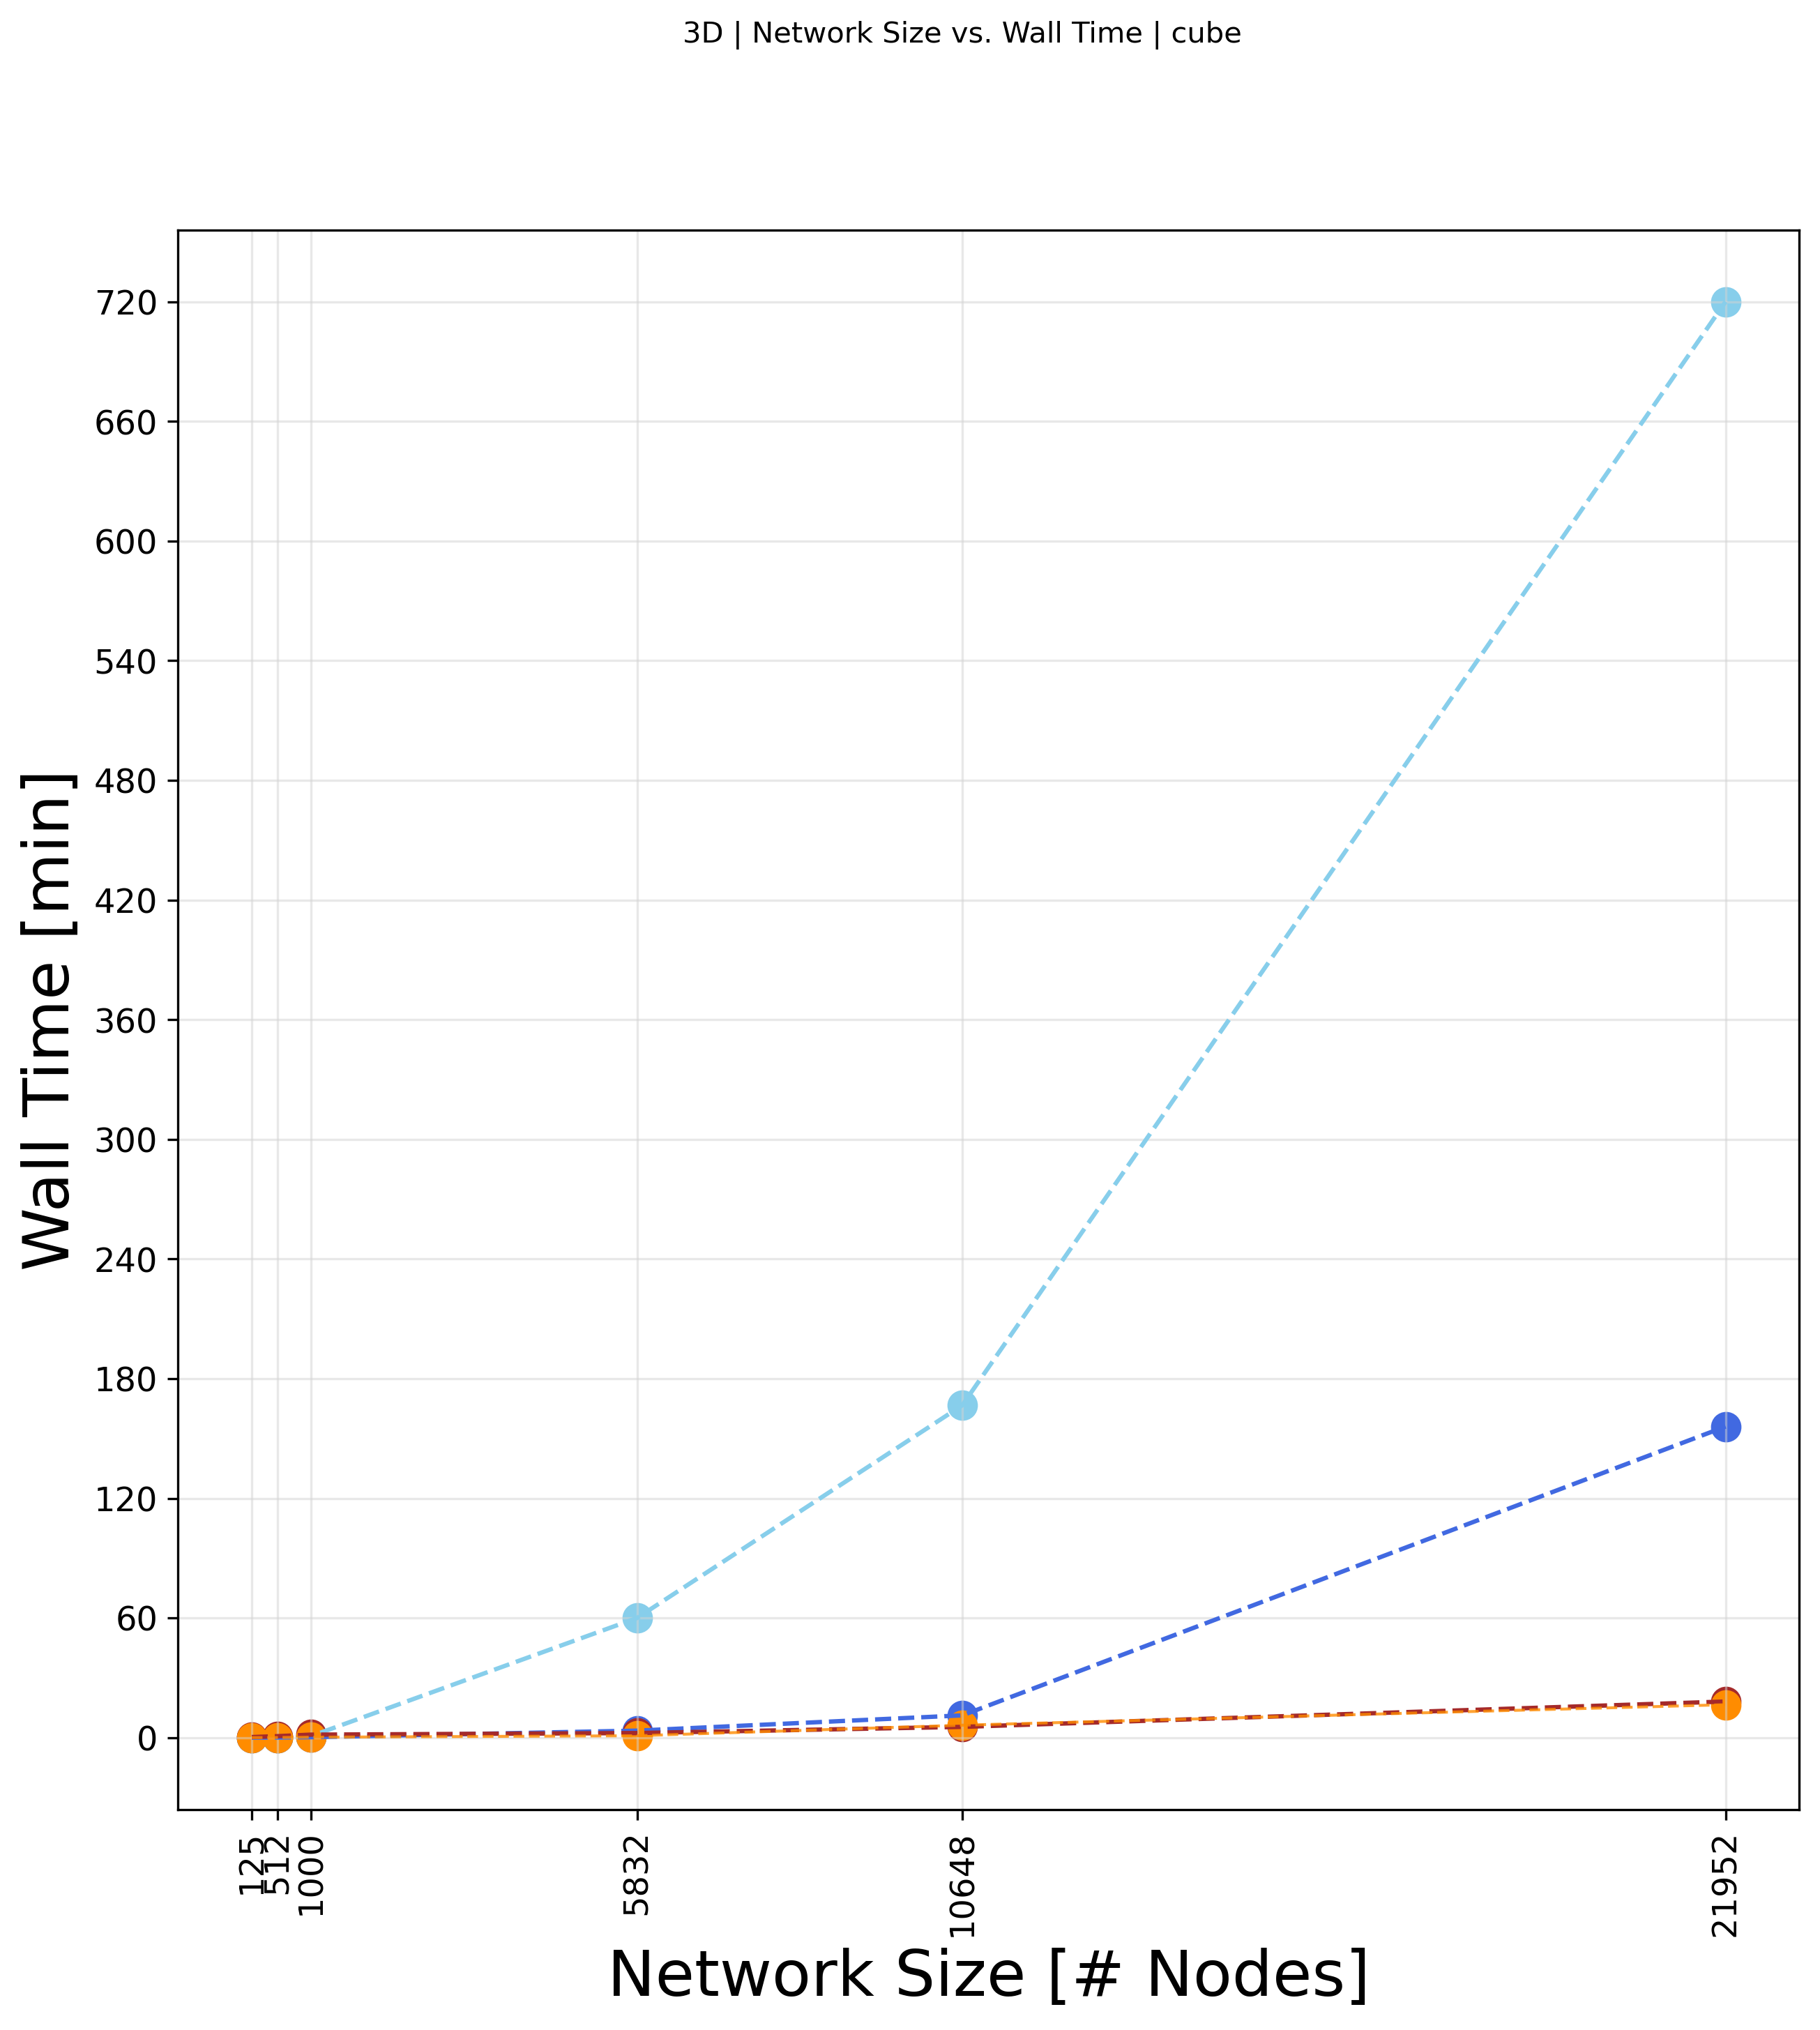

In [14]:
########################################
#
# Network size vs. time
# with same correlation factor
#
########################################

x_nx = net_sizes
y_nx = [(i/60) for i in d_netsize_time_nx.values()]# list(d_netsize_time_spring.values())

x_ig = net_sizes
y_ig = [(i/60) for i in d_netsize_time_ig.values()]# list(d_netsize_time_spring.values())

x_layout = net_sizes 
y_layout = [(i/60) for i in d_netsize_time.values()]

x_nodevec = net_sizes
y_nodevec = [(i/60) for i in d_netsize_time_nodevec.values()]

fig = plt.figure(figsize=(10,10), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.yticks([0,60,120,180,240,300,360,420,480,540,600,660,720])
plt.ylabel("Wall Time [min]", fontsize=labelsize)

plt.plot(x_nx,y_nx, '--', c = 'skyblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nx,y_nx, c = 'skyblue', s = 30*3, alpha = 1.0)

plt.plot(x_ig,y_ig, '--', c = 'royalblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_ig,y_ig, c = 'royalblue', s = 30*3, alpha = 1.0)

plt.plot(x_nodevec,y_nodevec, '--', c = 'brown', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nodevec,y_nodevec, c = 'brown', s = 30*3, alpha = 1.0)

plt.plot(x_layout,y_layout, '--', c = 'darkorange', alpha = 0.8, linewidth=1)
plt.scatter(x_layout,y_layout, c = 'darkorange', s = 30*3, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('3D | Network Size vs. Wall Time | '+organism, fontsize=10)

plt.xticks(net_sizes,fontsize=tick_size, rotation=90)
plt.yticks(fontsize=tick_size)

fig.savefig('../output_plots/benchmark/upscaledNEW_3D_TimeNetsize_'+organism+'_ig_nx.png')
fig.savefig('../output_plots/benchmark/upscaledNEW_3D_TimeNetsize_'+organism+'_ig_nx.pdf')